# Mi primera regresión logística

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)


## Importar librerías


In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

## Carga de datos


In [2]:
digits = load_digits()

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
image = np.reshape(digits.data[17], (8, 8))

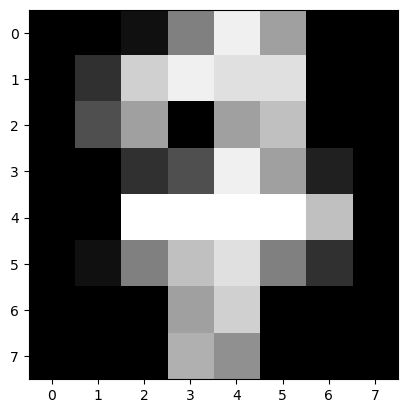

In [8]:
plt.imshow(image, cmap='gray')

In [9]:
digits.target[17]

7

## Split de datos en train y test


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=0)

## Entrenamiento de modelo


In [17]:
model = LogisticRegression()

model.fit(x_train, y_train)

/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluación del modelo


In [18]:
predictions = model.predict(x_test)
probabilities = model.predict_proba(x_test)

In [44]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, probabilities)
print('log loss: ', loss)

log loss:  0.14723603527684087


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

<Axes: >

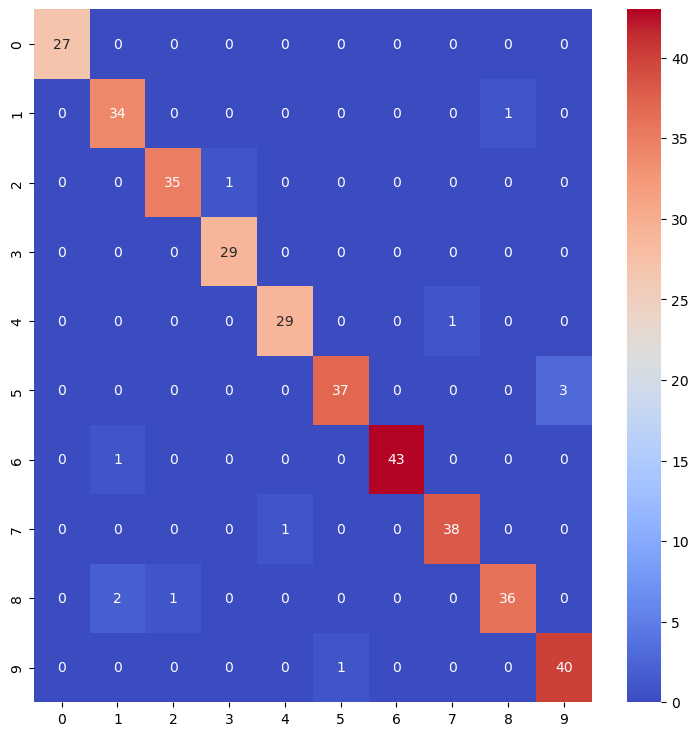

In [25]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, cmap='coolwarm')